# Imports and Setup

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy


# Hyperparameter Grid Search

In [8]:
hyperparams = {
    "n_perturb": [50, 200],
    "sigma": [0.1, 0.2, 0.3],
    "alpha": [0.001, 0.002, 0.004],
    "hidden_dim": [16]
}

results = []

for n_perturb in hyperparams["n_perturb"]:
    for sigma in hyperparams["sigma"]:
        for alpha in hyperparams["alpha"]:
            for hidden_dim in hyperparams["hidden_dim"]:
                
                print(f"Running: sigma={sigma}, alpha={alpha}, n_perturb={n_perturb}, hidden_dim={hidden_dim}")

                env = CustomInvertedPendulum()
                policy = SimplePolicyNet(input_dim=3, hidden_dim=hidden_dim, output_dim=1)
                es = EvolutionStrategy(policy=policy, env=env, n_perturb=n_perturb, sigma=sigma, alpha=alpha, episodes=5)

                num_iterations = 200
                performance = es.optimize(num_iterations)

                results.append({
                    "sigma": sigma,
                    "alpha": alpha,
                    "n_perturb": n_perturb,
                    "hidden_dim": hidden_dim,
                    "performance": performance
                })

                print("Final reward:", performance[-1])


Running: sigma=0.1, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -1331.9204584713902
Running: sigma=0.1, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -1435.502152380444
Running: sigma=0.1, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -1077.8328185555379
Running: sigma=0.2, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -97.84034702730379
Running: sigma=0.2, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -562.0915752174881
Running: sigma=0.2, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -1229.2238132392679
Running: sigma=0.3, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -165.6645008951321
Running: sigma=0.3, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -267.57550438453586
Running: sigma=0.3, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -54.190757619581426
Running: sigma=0.1, alpha=0.001, n_perturb=200, hidden_dim=16
Final reward: -154.6291931259955
Running: sigma=0.1, alpha=0.002, n_perturb=200, hidden

# Plot Reward Curves

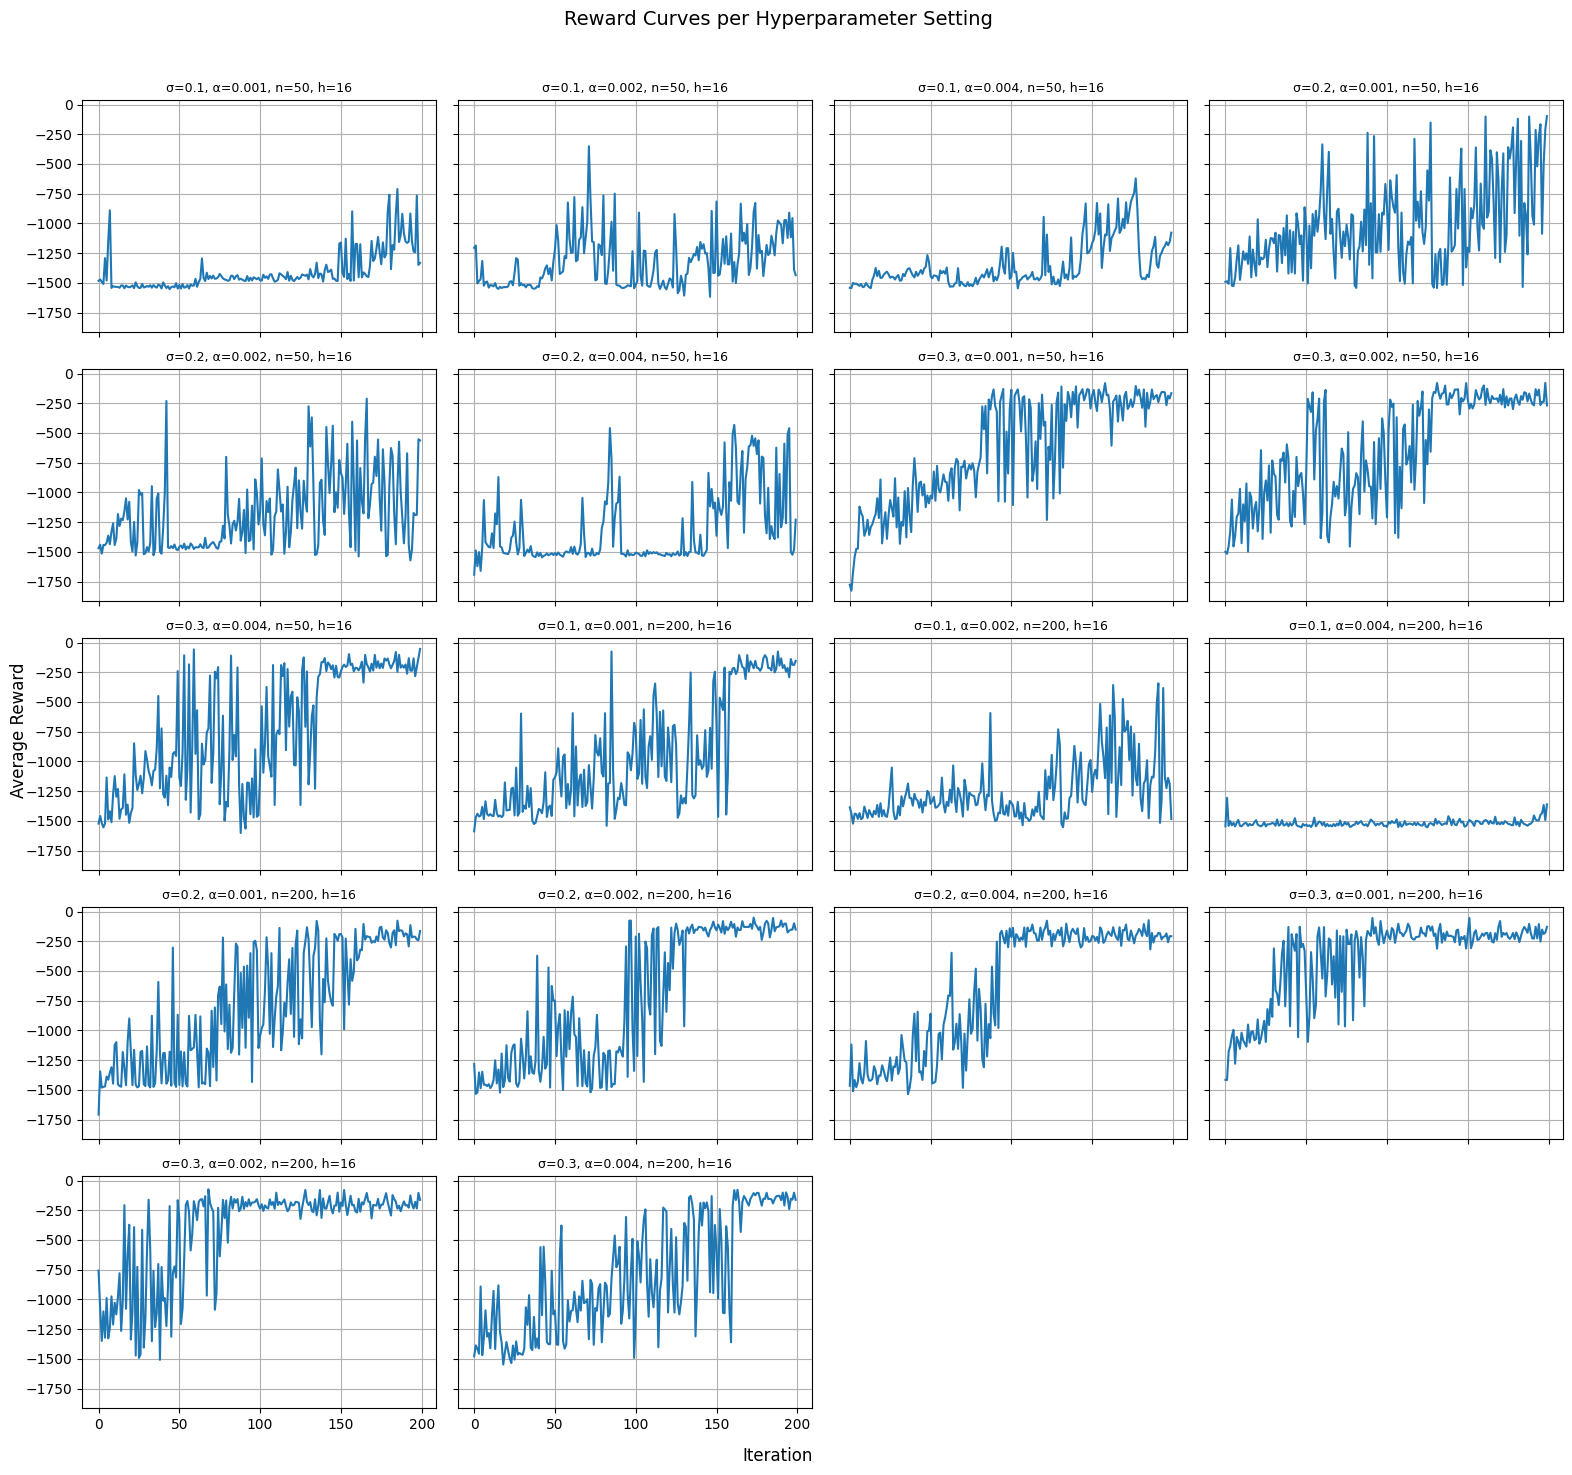

In [9]:
import matplotlib.pyplot as plt
import math

# Number of results
n = len(results)

# Set grid size: 4 columns, as many rows as needed
cols = 4
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)

for i, result in enumerate(results):
    row = i // cols
    col = i % cols
    ax = axs[row, col] if rows > 1 else axs[col]  # handle single-row edge case

    label = f"σ={result['sigma']}, α={result['alpha']}, n={result['n_perturb']}, h={result['hidden_dim']}"
    ax.plot(result["performance"])
    ax.set_title(label, fontsize=9)
    ax.grid(True)


# Turn off unused subplots
for j in range(n, rows * cols):
    row = j // cols
    col = j % cols
    ax = axs[row, col] if rows > 1 else axs[col]
    ax.axis("off")

fig.suptitle("Reward Curves per Hyperparameter Setting", fontsize=14)
fig.supxlabel("Iteration")
fig.supylabel("Average Reward")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


# Summary Table of Final Performance

In [10]:
from tabulate import tabulate

summary = []

for result in results:
    final_reward = result["performance"][-1]
    avg_last_10 = np.mean(result["performance"][-10:])
    summary.append([
        result["sigma"],
        result["alpha"],
        result["n_perturb"],
        result["hidden_dim"],
        round(final_reward, 2),
        round(avg_last_10, 2)
    ])

headers = ["σ", "α", "n_perturb", "hidden_dim", "Final Reward", "Avg Last 10"]
summary.sort(key=lambda x: x[4], reverse=True)
print(tabulate(summary, headers=headers, tablefmt="pretty"))


+-----+-------+-----------+------------+--------------+-------------+
|  σ  |   α   | n_perturb | hidden_dim | Final Reward | Avg Last 10 |
+-----+-------+-----------+------------+--------------+-------------+
| 0.3 | 0.004 |    50     |     16     |    -54.19    |   -185.77   |
| 0.2 | 0.001 |    50     |     16     |    -97.84    |   -500.15   |
| 0.3 | 0.001 |    200    |     16     |   -129.22    |   -181.3    |
| 0.2 | 0.002 |    200    |     16     |   -151.44    |   -130.06   |
| 0.1 | 0.001 |    200    |     16     |   -154.63    |   -195.71   |
| 0.3 | 0.004 |    200    |     16     |   -161.98    |   -153.22   |
| 0.3 | 0.002 |    200    |     16     |   -162.79    |   -188.72   |
| 0.2 | 0.001 |    200    |     16     |   -163.58    |   -206.38   |
| 0.3 | 0.001 |    50     |     16     |   -165.66    |   -190.73   |
| 0.2 | 0.004 |    200    |     16     |    -207.6    |   -208.66   |
| 0.3 | 0.002 |    50     |     16     |   -267.58    |   -206.37   |
| 0.2 | 0.002 |    5